In [3]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)



Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [100]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------

print(np.dot(features, features.transpose()))
w_analytic = np.dot(np.dot(np.linalg.inv(np.dot(features.transpose(), features)),features.transpose()),y)

#reg = LinearRegression().fit(features, y)
#print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")

#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

reg = LinearRegression().fit(features, y)
print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")

[[250046.12470894 234704.8649086  231908.49740847 ... 244703.796433
  243227.54381761 244045.07197363]
 [234704.8649086  222839.30653025 219777.7037737  ... 231343.03418161
  229847.20920909 230554.32954727]
 [231908.49740847 219777.7037737  217076.20171315 ... 228084.36044439
  226628.4055229  227465.04666632]
 ...
 [244703.796433   231343.03418161 228084.36044439 ... 241009.43915303
  239489.38497244 240088.00417713]
 [243227.54381761 229847.20920909 226628.4055229  ... 239489.38497244
  237984.91341818 238587.41783916]
 [244045.07197363 230554.32954727 227465.04666632 ... 240088.00417713
  238587.41783916 239276.63580171]]
Евклидово расстояние между наборами коэффициентов 15.068939626231383

Аналитически определённые коэффициенты [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
Коэффициенты, вычисленные моделью sklearn <c

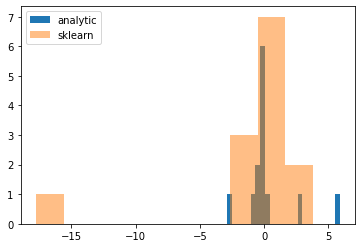

In [106]:
from matplotlib import pyplot as plt

plt.hist(w_analytic, alpha=1, bins='auto', label='analytic')
plt.hist(reg.coef_, alpha=0.5, label='sklearn')
plt.legend(loc='upper left')
plt.show()